In [30]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')


In [31]:
results_path_a = Path('5Min_ncut_05obsy_123day_lookahead_default_lookback')

data_path_a = results_path_a / 'data+prices.ftr'
data_a = pd.read_feather(data_path_a).sort_index().set_index(['date', 'ticker'])

data_a.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11653877 entries, (Timestamp('2013-05-22 15:20:00'), 'btc-usd') to (Timestamp('2021-06-20 14:35:00'), 'yfi-usd')
Data columns (total 29 columns):
 #   Column        Dtype  
---  ------        -----  
 0   open          float32
 1   high          float32
 2   low           float32
 3   close         float32
 4   volume        float64
 5   rsi           float32
 6   bb_high       float32
 7   bb_low        float32
 8   NATR          float32
 9   ATR           float32
 10  PPO           float32
 11  MACD          float32
 12  sector        int16  
 13  r288          float32
 14  r576          float32
 15  r864          float32
 16  r288dec       float32
 17  r576dec       float32
 18  r864dec       float32
 19  r288q_sector  float32
 20  r576q_sector  float32
 21  r864q_sector  float32
 22  r288_fwd      float32
 23  r576_fwd      float32
 24  r864_fwd      float32
 25  year          int16  
 26  month         int16  
 27  weekday       in

In [32]:
results_path_b = Path('results_D_144_ncut_1yrs')
data_path_b = results_path_b / 'data+prices.ftr'
data_b = pd.read_feather(data_path_b).sort_index().set_index(['date', 'offset', 'ticker'])
data_b.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11211158 entries, (Timestamp('2013-05-03 00:00:00'), 10, 'btc-usd') to (Timestamp('2021-06-20 00:00:00'), 870, 'wbtc-usd')
Data columns (total 28 columns):
 #   Column       Dtype  
---  ------       -----  
 0   open         float32
 1   high         float32
 2   low          float32
 3   close        float32
 4   volume       float64
 5   rsi          float32
 6   bb_high      float32
 7   bb_low       float32
 8   NATR         float32
 9   ATR          float32
 10  PPO          float32
 11  MACD         float32
 12  sector       int16  
 13  r01          float32
 14  r02          float32
 15  r03          float32
 16  r01dec       float32
 17  r02dec       float32
 18  r03dec       float32
 19  r01q_sector  float32
 20  r02q_sector  float32
 21  r03q_sector  float32
 22  r01_fwd      float32
 23  r02_fwd      float32
 24  r03_fwd      float32
 25  year         int16  
 26  month        int16  
 27  weekday      int16  
dtypes: float3

ticker
btc-usd    AxesSubplot(0.125,0.383857;0.775x0.107857)
dtype: object

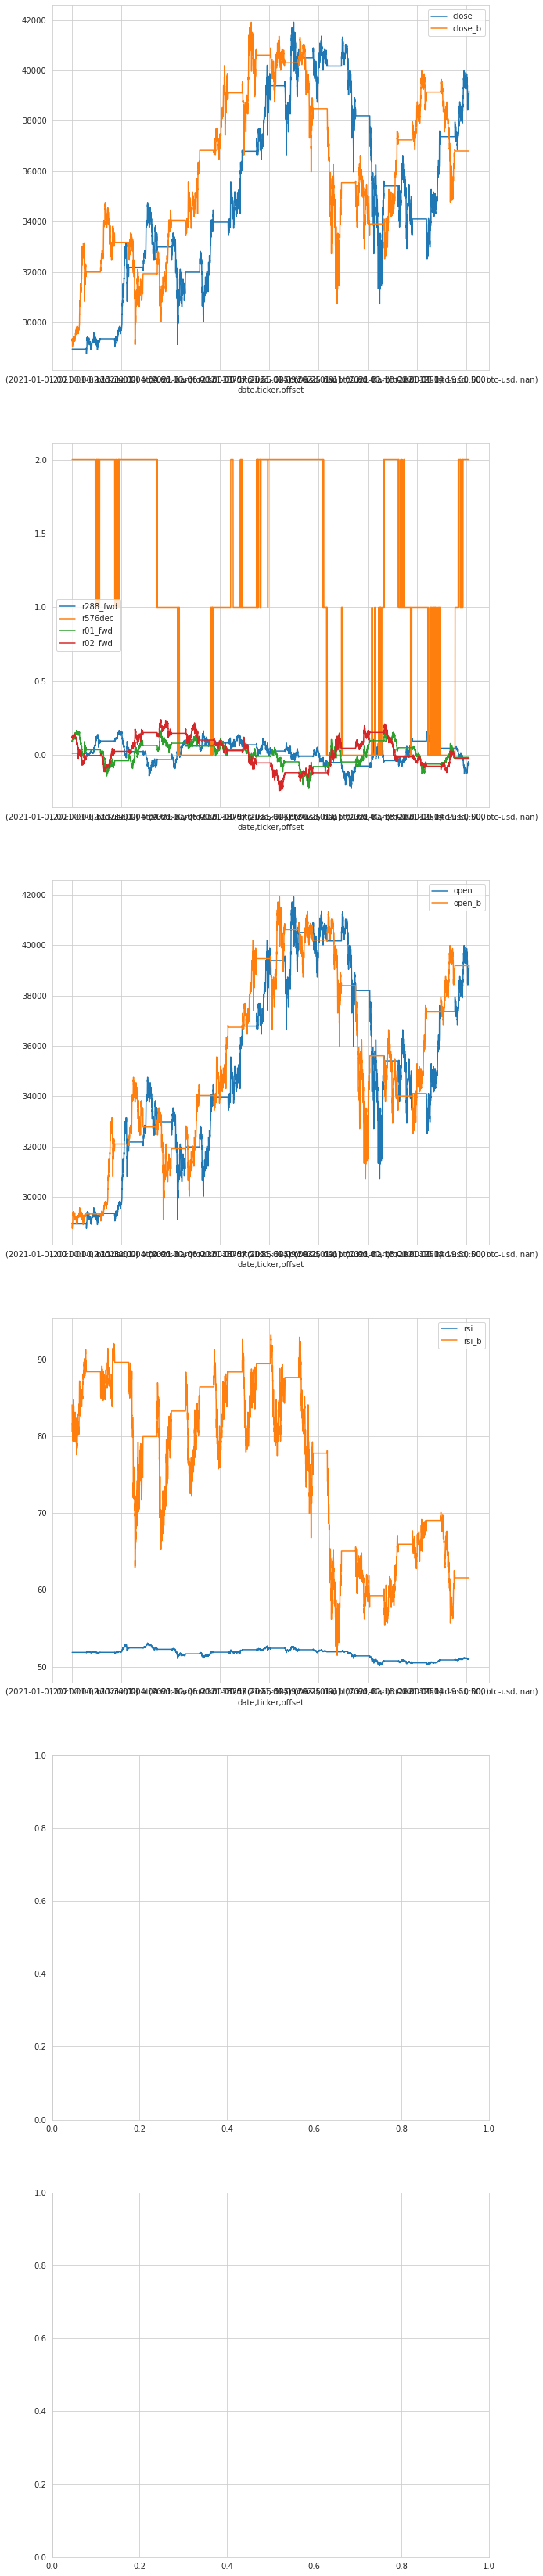

In [43]:
data_a_snip = data_a.loc["2021-01-01":"2021-01-14", 'btc-usd', :]
data_b_snip = data_b.loc["2021-01-01":"2021-01-14", :, 'btc-usd', :]

data = data_a_snip.join(data_b_snip, rsuffix='_b').ffill()


fig, axs = plt.subplots(nrows=6, figsize=(10, 60))
data[['close', 'close_b']].groupby('ticker').plot(ax=axs[0])
data[['r288_fwd', 'r576dec', 'r01_fwd', 'r02_fwd']].groupby('ticker').plot(ax=axs[1])

data[['open', 'open_b']].groupby('ticker').plot(ax=axs[2])
data[['rsi', 'rsi_b']].groupby('ticker').plot(ax=axs[3])


In [ ]:
cols=['rsi', 'rsi_b']
data[cols].plot()